In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation,Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
X_train  = np.loadtxt(r"C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\load_digits\train_X.csv",delimiter=',')
y_train = np.loadtxt(r"C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\load_digits\train_label.csv",delimiter=',')

X_test = np.loadtxt(r"C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\load_digits\test_X.csv",delimiter=',')
y_test = np.loadtxt(r"C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\load_digits\test_label.csv",delimiter=',')

In [3]:
print("Shape of X_train",X_train.shape)
print("Shape of y_train", y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (1000, 784)
Shape of y_train (1000, 10)
Shape of X_test (350, 784)
Shape of y_test (350, 10)


In [5]:
model = Sequential()
model.add(Dense(1000, input_shape=X_train[0].shape, activation="relu"))
# model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [6]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["acc"])

In [7]:
history = model.fit(X_train,y_train,batch_size=32,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
32/32 [==============================] - 3s 38ms/step - loss: 40.7298 - acc: 0.6430 - val_loss: 23.6560 - val_acc: 0.8086
Epoch 2/20
32/32 [==============================] - 1s 25ms/step - loss: 6.8817 - acc: 0.8950 - val_loss: 13.0454 - val_acc: 0.8657
Epoch 3/20
32/32 [==============================] - 1s 27ms/step - loss: 4.8329 - acc: 0.9170 - val_loss: 15.8631 - val_acc: 0.8257
Epoch 4/20
32/32 [==============================] - 1s 25ms/step - loss: 2.1716 - acc: 0.9480 - val_loss: 12.1471 - val_acc: 0.8571
Epoch 5/20
32/32 [==============================] - 1s 26ms/step - loss: 1.5892 - acc: 0.9570 - val_loss: 15.6785 - val_acc: 0.8457
Epoch 6/20
32/32 [==============================] - 1s 28ms/step - loss: 1.7048 - acc: 0.9650 - val_loss: 17.6551 - val_acc: 0.8543
Epoch 7/20
32/32 [==============================] - 1s 23ms/step - loss: 0.5222 - acc: 0.9830 - val_loss: 15.0151 - val_acc: 0.8629
Epoch 8/20
32/32 [==============================] - 1s 26ms/step - loss: 0.

In [8]:
result = model.evaluate(X_test,y_test)
result

11/11 [==============================] - 0s 7ms/step - loss: 16.0474 - acc: 0.8600


[16.04743194580078, 0.8600000143051147]

In [9]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 16.04743194580078
acc : 0.8600000143051147


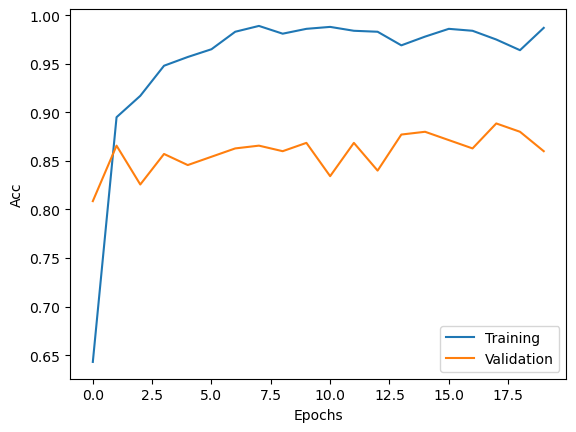

In [10]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend(["Training","Validation"])
plt.show()

In [13]:
def  Prediction_cat(model,image):
    global w,h
    pred = model.predict(image)
    
    color = ["red"]*10
    num = pred.argmax()
    color[num]  = "blue"
    
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    plt.imshow(image.reshape(28,28),cmap="gray",interpolation="bicubic")
    plt.xticks([])
    plt.yticks([])
    plt.title("Image")
    
    plt.subplot(1,2,2)
    plt.bar(x=[0,1,2,3,4,5,6,7,8,9],height=pred.flatten(),color=color)
    plt.xlabel("Digits")
    plt.ylabel("probability")
    plt.title("Prediction")
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.show()

1/1 [==============================] - 0s 67ms/step


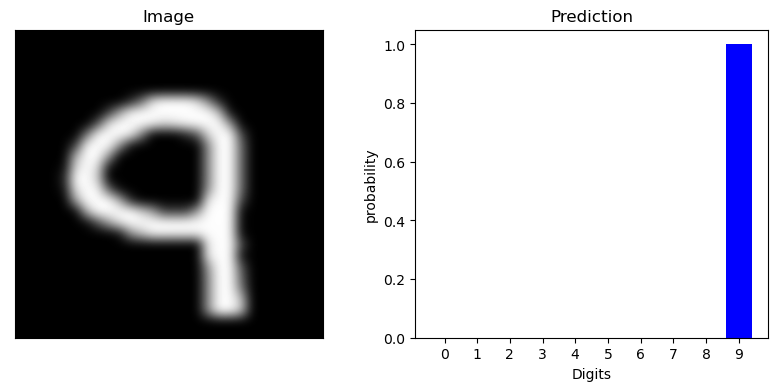

1/1 [==============================] - 0s 16ms/step


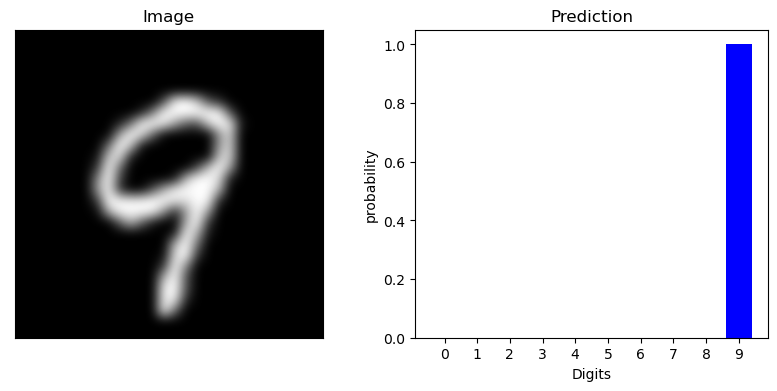

1/1 [==============================] - 0s 17ms/step


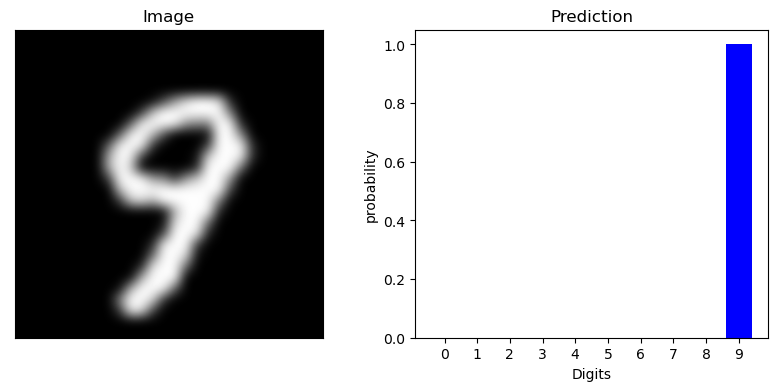

1/1 [==============================] - 0s 17ms/step


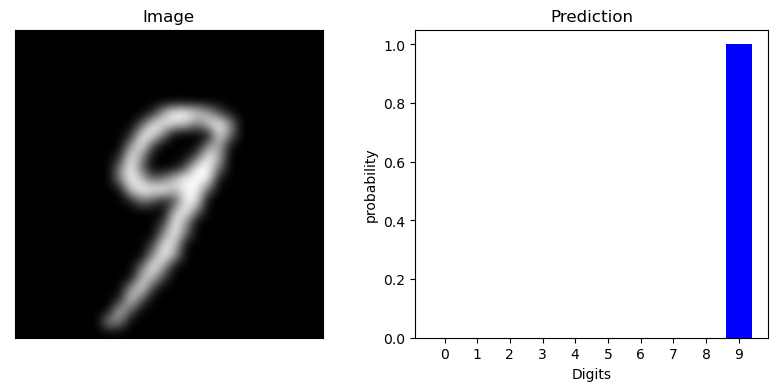

1/1 [==============================] - 0s 18ms/step


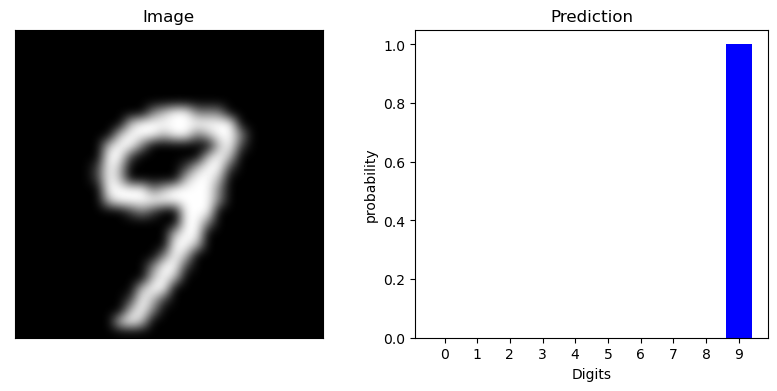

In [14]:
for i in range(315,320):
    Prediction_cat(model,X_test[i].reshape(1,-1))

AttributeError: 'numpy.ndarray' object has no attribute 'sample'